# CAPSTONE PROJECT COVID-19


Q1 :**Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment?**

Ans : In today's world, the accurate prediction of diseases, especially infectious ones like COVID-19, holds  importance due to several key reasons:
 1. Early prediction enables early intervention and preventive measures so that identification of potential hotspots allows authorities to implement targeted interventions such as testing, contact tracing, and quarantine, reducing the overall spread of the disease.

 2. Prediction of potential disease  contribute to public awareness.When people are informed about potential risk through campaign and through initiative by locals, so they would take rventive measure like waearing mask when going outside.

 3. Prediction of disease  helps in managing and reducing the burden of healthcare system.Hospitals can prepare well and train there staff  according the pandemic situation.



 Q2: **How is it going to impact the medical field when it comes to effective screening and reducing health care burden.**

 Ans :
  1. Eary prediction of disease contributes to early dectection, so that doctor can isolate the patient from others anf give proper treatment.

  2. Disease prediction aids in planning and executing vaccination campaigns strategically. High-risk populations and regions can be prioritized for vaccination efforts.

  3. Predictive models can assist in managing healthcare worker schedules and resources, preventing burnout.


Q3. **If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease?.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# sns.get_dataset_names()
corona_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/corona_dataset.csv")
corona_df.head()

<ipython-input-1-3ec60780a534>:6: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  corona_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/corona_dataset.csv")


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


### **Section 2: Initial Hypothesis (or hypotheses)**

Q1. **Here you have to make some assumptions based on the questions you want to address based on the DA track or ML track**

Ans : Hypothesis 1 : Person with cough_symptoms  have chance to have sore_throat.

Hypothesis 2 : Person with shortness of breath  have high chance to corona positive.

Hypothesis 3 : Gradient Boosting Algorithm based ML predict accurate value.


## **Section 3: Data analysis approach**

In [2]:
#Get to know about columns   present in dataset :
print(list(corona_df.columns))

['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex', 'Known_contact']


In [3]:
#Get know about data type of each colmn and total number non-null values of each column
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [4]:
#Get know about missing values in each column
corona_df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [5]:
#Give Description of dataset including the column which have datatype object
corona_df.describe(include='object')

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,51,5,5,5,5,5,3,3,3,3
top,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,10921,127531,137774,212584,212842,212326,260227,127320,130158,242741


In [6]:
#To check about the number of duplicated columns.
corona_df.duplicated().sum()

0

In [7]:
#No duplicated rows in dataframe.
#Checking for the number of categories(if present ) in each column
print(corona_df["Cough_symptoms"].value_counts())
print("---------------------------------------------")
print(corona_df["Fever"].value_counts())
print("---------------------------------------------")
print(corona_df["Sore_throat"].value_counts())
print("---------------------------------------------")
print(corona_df["Shortness_of_breath"].value_counts())
print("---------------------------------------------")
print(corona_df["Headache"].value_counts())
print("---------------------------------------------")
print(corona_df["Age_60_above"].value_counts())
print("---------------------------------------------")
print(corona_df["Sex"].value_counts())
print("---------------------------------------------")
print(corona_df["Known_contact"].value_counts())
print("---------------------------------------------")
print(corona_df["Corona"].value_counts())
print("---------------------------------------------")

False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64
---------------------------------------------
False    137774
FALSE    119070
TRUE      11750
True      10002
None        252
Name: Fever, dtype: int64
---------------------------------------------
False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64
---------------------------------------------
False    212842
FALSE     64428
TRUE       1107
True        470
None          1
Name: Shortness_of_breath, dtype: int64
---------------------------------------------
False    212326
FALSE     64107
TRUE       1428
True        986
None          1
Name: Headache, dtype: int64
---------------------------------------------
None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64
---------------------------------------------
female    130158
male      129127
None       19563
Name: Sex, dtype: int64
---------

we have  checked each column regarding the number of categories  and columns "**Cough_symptoms**","**Fever**","**Sore_throat**", "**Shortness_of_breath**","**Headache**" have 5 diffrent categories , but it shold be 3 as '**TRUE**' and '**true**' are considered different but it is same , same goes for '**False**'

second there is conflict about data type of column.

Column "**Age_60_above**" have 3 categories('**None**', '**Yes**','**No**') , ideally it should be 2.

Column '**Sex**', '**Known_contact**'  , '**Corona**' have dtype  int64 , it should be object.

In [ ]:
corona_df = corona_df.astype({"Fever": object, "Sore_throat": object,"Shortness_of_breath": object,"Age_60_above": object,"Sex": object ,"Known_contact": object,"Corona": object})

In [ ]:
#Changing  the value 'True' to 'true' and 'False' to false for every column in which they occur
corona_df['Cough_symptoms'] = corona_df['Cough_symptoms'].apply(lambda x: 'false' if x==False else x)
corona_df['Cough_symptoms'] = corona_df['Cough_symptoms'].apply(lambda x: 'true' if x==True else x)

corona_df['Fever'] = corona_df['Fever'].apply(lambda x: 'false' if x==False else x)
corona_df['Fever'] = corona_df['Fever'].apply(lambda x: 'true' if x==True else x)

corona_df['Sore_throat'] = corona_df['Sore_throat'].apply(lambda x: 'false' if x==False else x)
corona_df['Sore_throat'] = corona_df['Sore_throat'].apply(lambda x: 'true' if x==True else x)

corona_df['Shortness_of_breath'] = corona_df['Shortness_of_breath'].apply(lambda x: 'false' if x==False else x)
corona_df['Shortness_of_breath'] = corona_df['Shortness_of_breath'].apply(lambda x: 'true' if x==True else x)

corona_df['Headache'] = corona_df['Headache'].apply(lambda x: 'false' if x==False else x)
corona_df['Headache'] = corona_df['Headache'].apply(lambda x: 'true' if x==True else x)


In [ ]:
# here coverting the 'TRUE'(UPPER) to 'true'(lower) and 'FALSE'(UPPER) to 'false'(lower)

corona_df['Cough_symptoms'] = corona_df['Cough_symptoms'].apply(lambda x: x.lower() if isinstance(x,str) else x)
corona_df['Fever'] = corona_df['Fever'].apply(lambda x: x.lower() if isinstance(x,str) else x)
corona_df['Sore_throat'] = corona_df['Sore_throat'].apply(lambda x: x.lower() if isinstance(x,str) else x)
corona_df['Shortness_of_breath'] = corona_df['Shortness_of_breath'].apply(lambda x: x.lower() if isinstance(x,str) else x)
corona_df['Headache'] = corona_df['Headache'].apply(lambda x: x.lower() if isinstance(x,str) else x)


In [ ]:
print(corona_df["Cough_symptoms"].value_counts())
print("---------------------------------------------")
print(corona_df["Fever"].value_counts())
print("---------------------------------------------")
print(corona_df["Sore_throat"].value_counts())
print("---------------------------------------------")
print(corona_df["Shortness_of_breath"].value_counts())
print("---------------------------------------------")
print(corona_df["Headache"].value_counts())
print("---------------------------------------------")


false    236368
true      42228
none        252
Name: Cough_symptoms, dtype: int64
---------------------------------------------
false    256844
true      21752
none        252
Name: Fever, dtype: int64
---------------------------------------------
false    276921
true       1926
none          1
Name: Sore_throat, dtype: int64
---------------------------------------------
false    277270
true       1577
none          1
Name: Shortness_of_breath, dtype: int64
---------------------------------------------
false    276433
true       2414
none          1
Name: Headache, dtype: int64
---------------------------------------------


In [ ]:
#replacing 'None' with 'No' in column 'Age_60_above'
corona_df['Age_60_above'] = corona_df['Age_60_above'].replace(['None', 'No'], 'No')
print(corona_df["Age_60_above"].value_counts())

#replacing 'Contact with confirmed' with 'Contact_with_confirmed' in column 'Age_60_above'
corona_df['Known_contact'] = corona_df['Known_contact'].replace(['Contact with confirmed'], 'Contact_with_confirmed')

print("---------------------------------------------")
print(corona_df["Sex"].value_counts())

No     253023
Yes     25825
Name: Age_60_above, dtype: int64
---------------------------------------------
female    130158
male      129127
None       19563
Name: Sex, dtype: int64


In [ ]:
corona_df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,true,false,true,false,false,negative,No,None,Abroad
1,2,11-03-2020,false,true,false,false,false,positive,No,None,Abroad
2,3,11-03-2020,false,true,false,false,false,positive,No,None,Abroad
3,4,11-03-2020,true,false,false,false,false,negative,No,None,Abroad
4,5,11-03-2020,true,false,false,false,false,negative,No,None,Contact_with_confirmed


In [ ]:
#To check the number of corona cases occur each day
corona_df["Test_date"].value_counts()

20-04-2020    10921
19-04-2020    10199
22-04-2020     9646
21-04-2020     9624
16-04-2020     9138
23-04-2020     8744
01-04-2020     8654
13-04-2020     8425
02-04-2020     8188
03-04-2020     8079
17-04-2020     7645
05-04-2020     7509
30-04-2020     7313
27-04-2020     7304
15-04-2020     7149
31-03-2020     7134
24-04-2020     7028
26-03-2020     6663
14-04-2020     6571
28-04-2020     6334
18-04-2020     6321
26-04-2020     6131
12-04-2020     5984
27-03-2020     5963
07-04-2020     5931
30-03-2020     5915
10-04-2020     5678
28-03-2020     5602
25-03-2020     5495
06-04-2020     5368
29-03-2020     5277
04-04-2020     5145
25-04-2020     5052
24-03-2020     4735
09-04-2020     4539
11-04-2020     4341
29-04-2020     4259
08-04-2020     4058
22-03-2020     3565
23-03-2020     3494
19-03-2020     2243
18-03-2020     1991
20-03-2020     1870
21-03-2020     1648
17-03-2020     1463
16-03-2020     1304
15-03-2020      985
13-03-2020      686
12-03-2020      634
14-03-2020      609


<ipython-input-87-142ae7b6a624>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=corona_df['Cough_symptoms'], palette='Blues')
<ipython-input-87-142ae7b6a624>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=corona_df['Fever'], palette='Reds')
<ipython-input-87-142ae7b6a624>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=corona_df['Sore_throat'] , palette='Greens')
<ipython-input-87-142ae7b6a624>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variabl

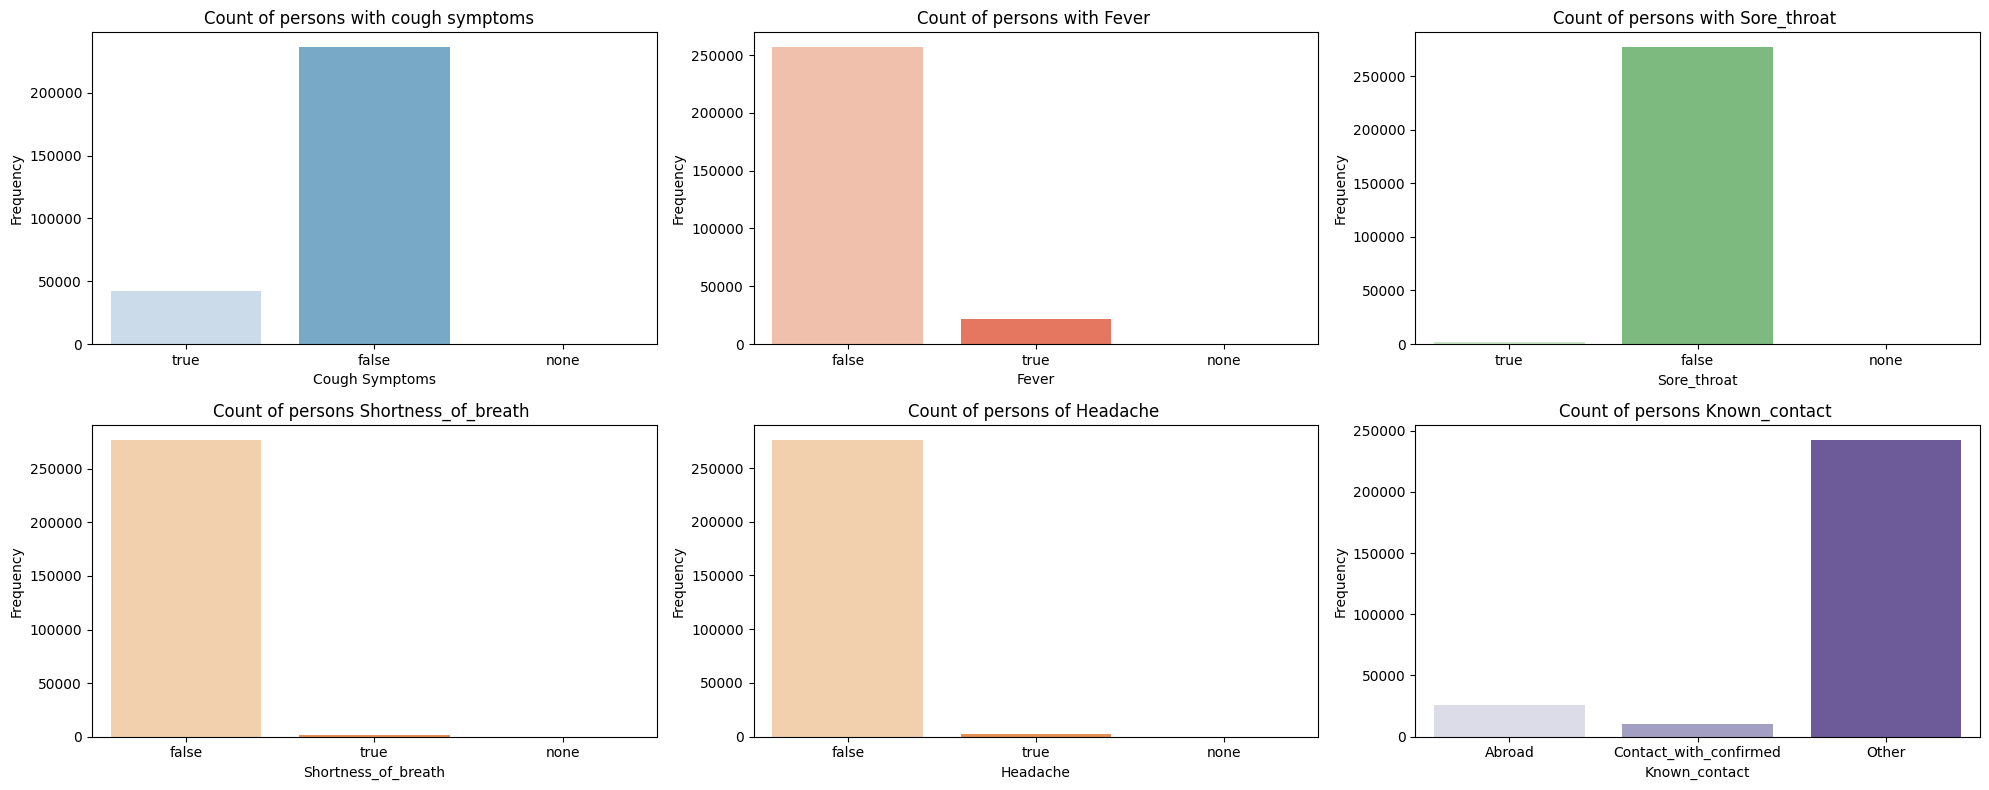

In [ ]:
#

plt.figure(figsize=(20, 8))  # Adjust the figure size
plt.subplot(2, 3, 1)
sns.countplot(x=corona_df['Cough_symptoms'], palette='Blues')
plt.xlabel("Cough Symptoms")
plt.ylabel("Frequency")
plt.title("Count of persons with cough symptoms  ")

plt.subplot(2, 3, 2)
sns.countplot(x=corona_df['Fever'], palette='Reds')
plt.xlabel("Fever")
plt.ylabel("Frequency")
plt.title("Count of persons with Fever ")

plt.subplot(2, 3, 3)
sns.countplot(x=corona_df['Sore_throat'] , palette='Greens')
plt.xlabel("Sore_throat")
plt.ylabel("Frequency")
plt.title("Count of persons with Sore_throat ")

plt.subplot(2, 3, 4)
sns.countplot(x=corona_df['Shortness_of_breath'], palette='Oranges')
plt.xlabel("Shortness_of_breath")
plt.ylabel("Frequency")
plt.title("Count of persons Shortness_of_breath ")

plt.subplot(2, 3, 5)
sns.countplot(x=corona_df['Headache']  , palette='Oranges')
plt.xlabel("Headache")
plt.ylabel("Frequency")
plt.title("Count of persons of Headache ")

plt.subplot(2, 3, 6)
sns.countplot(x=corona_df['Known_contact'] , palette='Purples')
plt.xlabel("Known_contact")
plt.ylabel("Frequency")
plt.title("Count of persons Known_contact ")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


Plotted graph for each categorical column of given covid dataset.
From above graphs we can say that there are more number  of people that don't have cough symptoms, shortness of breath , headache, fever and sore throat

More number of people in contact with corona due to other reasons.


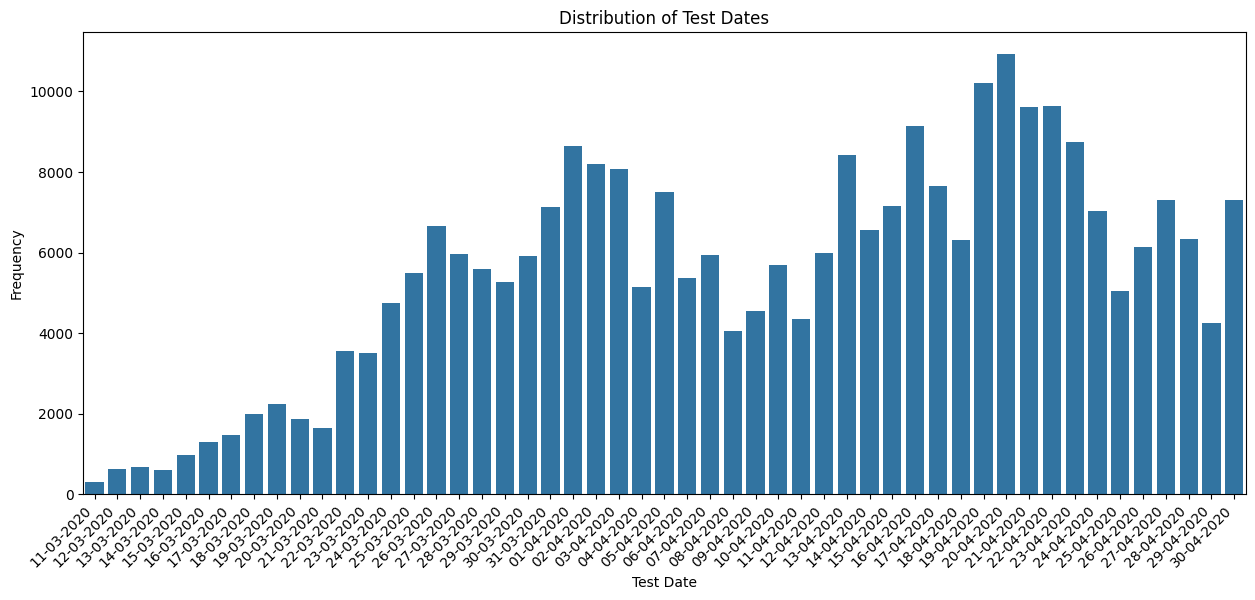

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x=corona_df['Test_date'])
plt.xlabel("Test Date")
plt.ylabel("Frequency")
plt.title("Distribution of Test Dates")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.show()

Above graph shows that each day total number cases of corona ouucured either positive or negative and maximum number of cases occured on **20-04-2020**

<ipython-input-97-b63ba955b2ab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=corona_df['Corona'], palette='Blues')


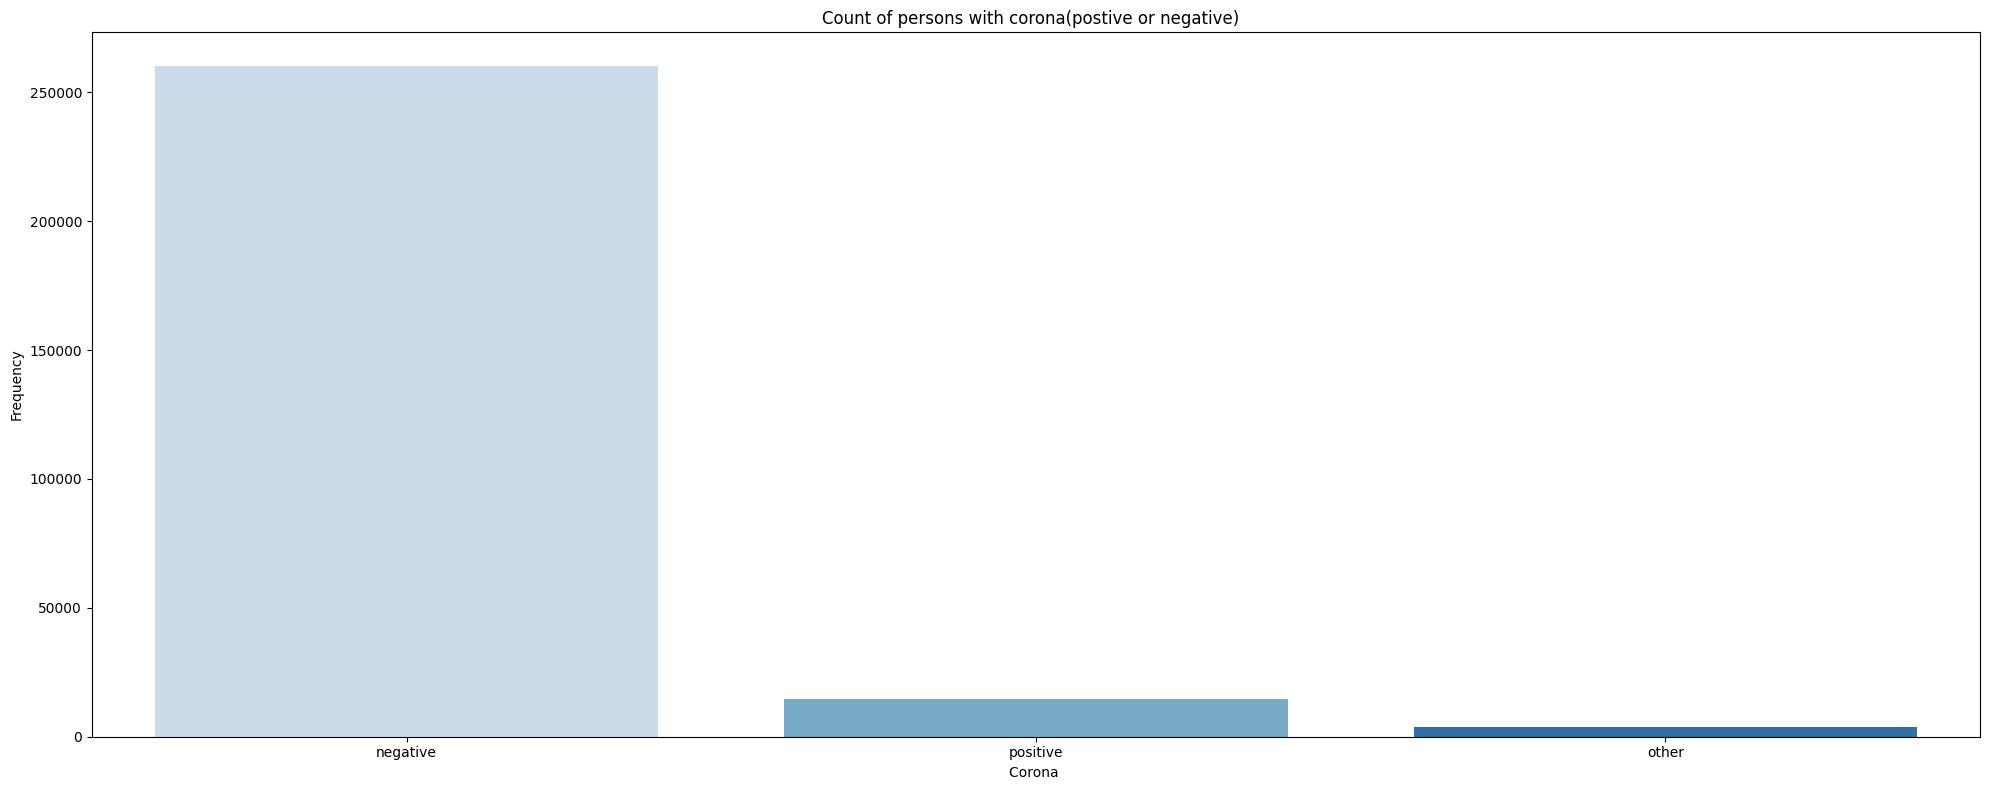

In [ ]:
plt.figure(figsize=(20, 8))  # Adjust the figure size

sns.countplot(x=corona_df['Corona'], palette='Blues')
plt.xlabel("Corona ")
plt.ylabel("Frequency")
plt.title("Count of persons with corona(postive or negative)  ")



plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
# Here calculating the number of cases of corona(postive or negative) with each column
corona_with_Cough_symptoms= pd.crosstab(corona_df['Cough_symptoms'], corona_df['Corona'], margins=True)
print(corona_with_Cough_symptoms)

print("---------------------------------------------------------------------------")
corona_with_Fever= pd.crosstab(corona_df['Fever'], corona_df['Corona'], margins=True)
print(corona_with_Fever)
print("---------------------------------------------------------------------------")
corona_with_Sore_throat= pd.crosstab(corona_df['Sore_throat'], corona_df['Corona'], margins=True)
print(corona_with_Sore_throat)
print("---------------------------------------------------------------------------")

print("---------------------------------------------------------------------------")
corona_with_Shortness_of_breath= pd.crosstab(corona_df['Shortness_of_breath'], corona_df['Corona'], margins=True)
print(corona_with_Shortness_of_breath)
print("---------------------------------------------------------------------------")
corona_with_Headache= pd.crosstab(corona_df['Headache'], corona_df['Corona'], margins=True)
print(corona_with_Headache)
print("---------------------------------------------------------------------------")

corona_with_Known_contact= pd.crosstab(corona_df['Known_contact'], corona_df['Corona'], margins=True)
print(corona_with_Known_contact)

# corona_with_Fever= pd.crosstab(corona_df['Fever'], corona_df['Corona'], margins=True)
# print(corona_with_Fever)
# print("---------------------------------------------------------------------------")



Corona          negative  other  positive     All
Cough_symptoms                                   
false             225021   3235      8112  236368
none                 219      0        33     252
true               34987    657      6584   42228
All               260227   3892     14729  278848
---------------------------------------------------------------------------
Corona  negative  other  positive     All
Fever                                    
false     244192   3515      9137  256844
none         219      0        33     252
true       15816    377      5559   21752
All       260227   3892     14729  278848
---------------------------------------------------------------------------
Corona       negative  other  positive     All
Sore_throat                                   
false          259861   3858     13202  276921
none                0      0         1       1
true              366     34      1526    1926
All            260227   3892     14729  278848
--------------

In [ ]:
# plt.figure(figsize=(20, 8))  # Adjust the figure size
# plt.subplot(2, 3, 1)
# sns.heatmap(corona_with_Cough_symptoms, annot=True, fmt=',', cmap='YlGnBu')
# # plt.ylabel("Cough Symptoms")
# # plt.xlabel("Corona")
# plt.title("Relationship between Cough Symptoms and Corona ")

# plt.subplot(2, 3, 2)
# sns.heatmap(corona_with_Fever, annot=True, fmt=',', cmap='YlGnBu')
# plt.ylabel("Fever")
# plt.xlabel("Corona")
# plt.title("Relationship between Fever and Corona ")

# plt.subplot(2, 3, 3)
# sns.heatmap(corona_with_Sore_throat, annot=True, fmt=',', cmap='YlGnBu')
# plt.ylabel("Sore Throat")
# plt.xlabel("Corona")
# plt.title("Relationship between Sore Throat and Corona ")

# plt.subplot(2, 3, 4)
# sns.heatmap(corona_with_Shortness_of_breath, annot=True, fmt=',', cmap='YlGnBu')
# plt.ylabel("Shortness of Breath")
# plt.xlabel("Corona")
# plt.title("Relationship between Shortness of Breath and Corona ")

# plt.subplot(2, 3, 5)
# sns.heatmap(corona_with_Headache, annot=True, fmt=',', cmap='YlGnBu')
# plt.ylabel("Headache")
# plt.xlabel("Corona")
# plt.title("Relationship between Headache and Corona ")

# plt.subplot(2, 3, 6)
# sns.heatmap(corona_with_Known_contact, annot=True, fmt=',', cmap='YlGnBu')
# plt.ylabel("Known contact")
# plt.xlabel("Corona")
# plt.title("Relationship between Known contact and Corona ")

# plt.tight_layout()  # Adjust layout for better spacing
# plt.show()


Sore_throat      false  none  true     All
Cough_symptoms                            
false           235695     0   673  236368
none               247     1     4     252
true             40979     0  1249   42228
All             276921     1  1926  278848


<Axes: xlabel='Sore_throat', ylabel='Cough_symptoms'>

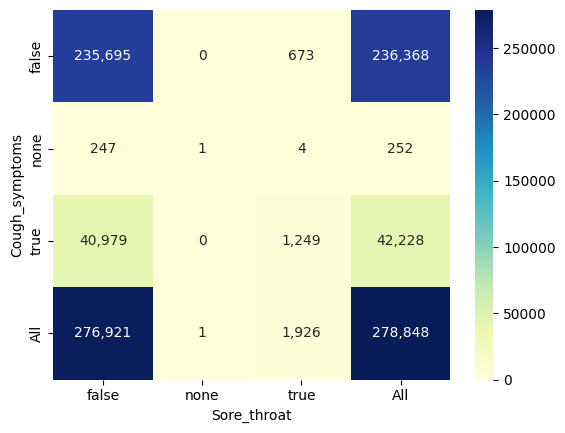

In [ ]:
cough_symp_with_sore_throat= pd.crosstab(corona_df['Cough_symptoms'], corona_df['Sore_throat'], margins=True)
print(cough_symp_with_sore_throat)

sns.heatmap(cough_symp_with_sore_throat, annot=True, fmt=',', cmap='YlGnBu')

<Figure size 1000x600 with 0 Axes>

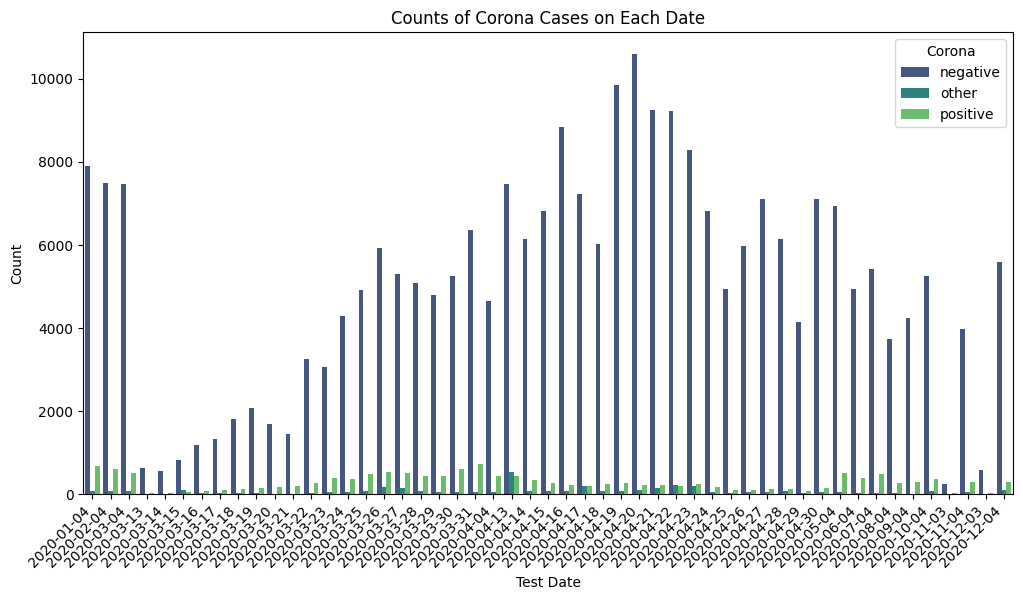

In [ ]:
# Plotted the graph to get psotive , negative corona cases on each day

plt.figure(figsize=(10, 6))
corona_df['Test_date'] = pd.to_datetime(corona_df['Test_date'])
corona_counts = corona_df.groupby(['Test_date', 'Corona']).size().reset_index(name='Count')

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Test_date', y='Count', hue='Corona', data=corona_counts, palette='viridis')
plt.title('Counts of Corona Cases on Each Date')
plt.xlabel('Test Date')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Corona', loc='upper right')
plt.show()

Maximum number of corona negative cases occur on **20 April 2020**
Maximum number of corona positive cases occur on **4 April 2020**

## Imputation


We have total 9 categorical columns :
**[  'Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex', 'Known_contact']**

Out of 9 columns 5 column have categorical value either `true` or`false`
So we are dropping other categorcial value as the data of `none` categorical value in 5 columns is less than 2 percent

Similarly for 'Corona' column , dropping the categorical value **other**

Similarly for 'Sex' column , dropping the categorical value **None**



In [ ]:
covid_df=corona_df.copy()
covid_df.drop(covid_df[covid_df['Corona'] == 'other'].index, inplace=True)
covid_df.drop(covid_df[covid_df['Cough_symptoms'] == 'none'].index, inplace=True)
covid_df.drop(covid_df[covid_df['Fever'] == 'none'].index, inplace=True)
covid_df.drop(covid_df[covid_df['Sore_throat'] == 'none'].index, inplace=True)
covid_df.drop(covid_df[covid_df['Shortness_of_breath'] == 'none'].index, inplace=True)
covid_df.drop(covid_df[covid_df['Headache'] == 'none'].index, inplace=True)
covid_df.drop(covid_df[covid_df['Sex'] == 'None'].index, inplace=True)
covid_df['Test_date'] = pd.to_datetime(covid_df['Test_date'])
covid_df.to_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_covid_data.csv', index=False)
print(covid_df.shape)
covid_df.info()

(255668, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 255668 entries, 13727 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               255668 non-null  int64         
 1   Test_date            255668 non-null  datetime64[ns]
 2   Cough_symptoms       255668 non-null  object        
 3   Fever                255668 non-null  object        
 4   Sore_throat          255668 non-null  object        
 5   Shortness_of_breath  255668 non-null  object        
 6   Headache             255668 non-null  object        
 7   Corona               255668 non-null  object        
 8   Age_60_above         255668 non-null  object        
 9   Sex                  255668 non-null  object        
 10  Known_contact        255668 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 23.4+ MB


In [ ]:
#Now covid_df is cleaned dataset can be used for further analysis
print(type(covid_df))
covid_df.head()

<class 'pandas.core.frame.DataFrame'>


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,13728,2020-03-22,true,false,false,false,false,negative,No,male,Abroad
13728,13729,2020-03-22,true,false,false,false,false,negative,No,female,Abroad
13730,13731,2020-03-22,true,true,false,false,false,positive,Yes,female,Other
13734,13735,2020-03-22,false,false,false,false,false,negative,No,male,Other
13735,13736,2020-03-22,false,false,false,false,false,negative,No,female,Other


In [ ]:
print(covid_df["Cough_symptoms"].value_counts())
print("---------------------------------------------")
print(covid_df["Fever"].value_counts())
print("---------------------------------------------")
print(covid_df["Sore_throat"].value_counts())
print("---------------------------------------------")
print(covid_df["Shortness_of_breath"].value_counts())
print("---------------------------------------------")
print(covid_df["Headache"].value_counts())
print("---------------------------------------------")
print(covid_df["Corona"].value_counts())

false    216616
true      39052
Name: Cough_symptoms, dtype: int64
---------------------------------------------
false    235814
true      19854
Name: Fever, dtype: int64
---------------------------------------------
false    254172
true       1496
Name: Sore_throat, dtype: int64
---------------------------------------------
false    254590
true       1078
Name: Shortness_of_breath, dtype: int64
---------------------------------------------
false    253565
true       2103
Name: Headache, dtype: int64
---------------------------------------------
negative    242136
positive     13532
Name: Corona, dtype: int64


In [ ]:
# Here calculating the number of cases of corona(postive or negative) with each column
covid_with_Cough_symptoms= pd.crosstab(covid_df['Cough_symptoms'], covid_df['Corona'], margins=True)
print(covid_with_Cough_symptoms)
print("---------------------------------------------------------------------------")
covid_with_Fever= pd.crosstab(covid_df['Fever'], covid_df['Corona'], margins=True)
print(covid_with_Fever)
print("---------------------------------------------------------------------------")
covid_with_Sore_throat= pd.crosstab(covid_df['Sore_throat'], covid_df['Corona'], margins=True)
print(covid_with_Sore_throat)
print("---------------------------------------------------------------------------")
covid_with_Shortness_of_breath= pd.crosstab(covid_df['Shortness_of_breath'], covid_df['Corona'], margins=True)
print(covid_with_Shortness_of_breath)
print("---------------------------------------------------------------------------")
covid_with_Headache= pd.crosstab(covid_df['Headache'], covid_df['Corona'], margins=True)
print(covid_with_Headache)
print("---------------------------------------------------------------------------")
covid_with_Known_contact= pd.crosstab(covid_df['Known_contact'], covid_df['Corona'], margins=True)
print(covid_with_Known_contact)

Corona          negative  positive     All
Cough_symptoms                            
false             209148      7468  216616
true               32988      6064   39052
All               242136     13532  255668
---------------------------------------------------------------------------
Corona  negative  positive     All
Fever                             
false     227322      8492  235814
true       14814      5040   19854
All       242136     13532  255668
---------------------------------------------------------------------------
Corona       negative  positive     All
Sore_throat                            
false          241999     12173  254172
true              137      1359    1496
All            242136     13532  255668
---------------------------------------------------------------------------
Corona               negative  positive     All
Shortness_of_breath                            
false                  242037     12553  254590
true                       99       97

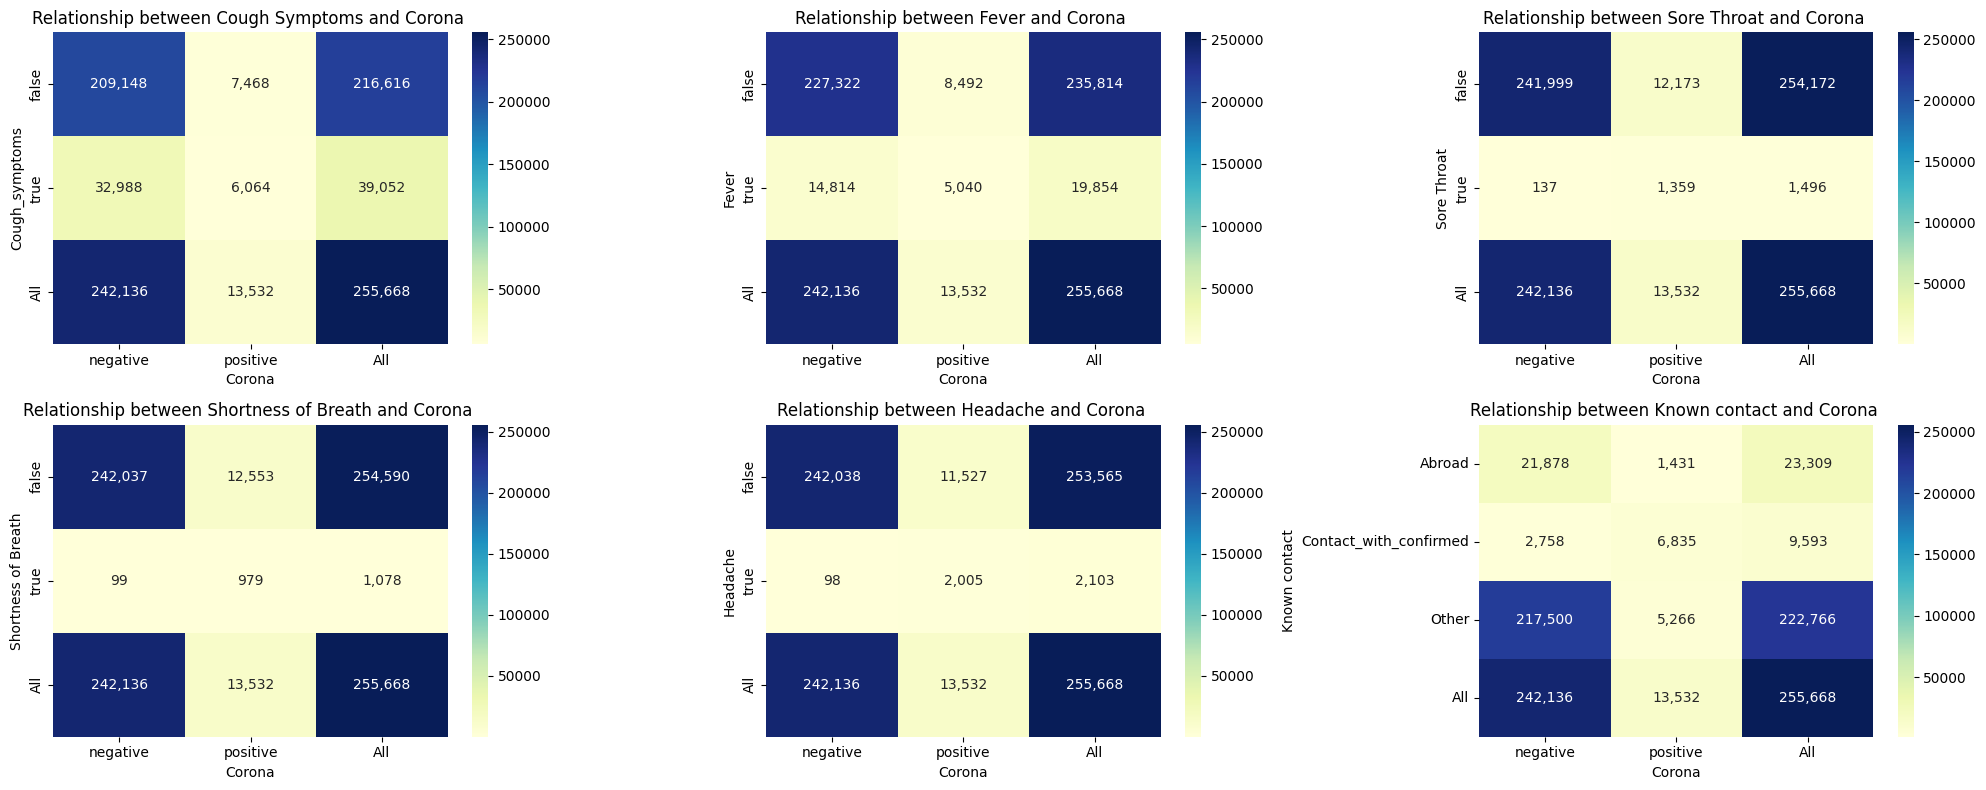

In [ ]:
plt.figure(figsize=(20, 8))  # Adjust the figure size
plt.subplot(2, 3, 1)
sns.heatmap(covid_with_Cough_symptoms, annot=True, fmt=',', cmap='YlGnBu')
# plt.ylabel("Cough Symptoms")
# plt.xlabel("Corona")
plt.title("Relationship between Cough Symptoms and Corona ")

plt.subplot(2, 3, 2)
sns.heatmap(covid_with_Fever, annot=True, fmt=',', cmap='Blues')
plt.ylabel("Fever")
plt.xlabel("Corona")
plt.title("Relationship between Fever and Corona ")

plt.subplot(2, 3, 3)
sns.heatmap(covid_with_Sore_throat, annot=True, fmt=',', cmap='BuPu')
plt.ylabel("Sore Throat")
plt.xlabel("Corona")
plt.title("Relationship between Sore Throat and Corona ")

plt.subplot(2, 3, 4)
sns.heatmap(covid_with_Shortness_of_breath, annot=True, fmt=',', cmap='Greens')
plt.ylabel("Shortness of Breath")
plt.xlabel("Corona")
plt.title("Relationship between Shortness of Breath and Corona ")

plt.subplot(2, 3, 5)
sns.heatmap(covid_with_Headache, annot=True, fmt=',', cmap='YlGnBu')
plt.ylabel("Headache")
plt.xlabel("Corona")
plt.title("Relationship between Headache and Corona ")

plt.subplot(2, 3, 6)
sns.heatmap(covid_with_Known_contact, annot=True, fmt=',', cmap='Blues')
plt.ylabel("Known contact")
plt.xlabel("Corona")
plt.title("Relationship between Known contact and Corona ")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

We have plotted heatmap for each column with respect to 'Corona' column

Form graph we observe that thefollowing insights :

* The person with  false cough symptoms have , negative result of corona test
* The person with  false fever(no fever) have , negative result of corona test
* The person with  false sore throat have , negative result of corona test
* The person with  false shortness of breath have , negative result of corona test
* The person with  false headache have , negative result of corona test
* The person in contact with confirmed known contact have positive result of corona.

* **In case of heatmap with shortness of breath and corona ,people with false shortness of breath test have positive corona result is more as compared to people with true shortness of breath test have positive corona result, which  shows some data can be false**. Similar pattern  occur in heatmap of headache vs corona.





In [ ]:
cough_symp_with_sore_throat= pd.crosstab(corona_df['Cough_symptoms'], corona_df['Sore_throat'], margins=True)
print(cough_symp_with_sore_throat)

sns.heatmap(cough_symp_with_sore_throat, annot=True, fmt=',', cmap='YlGnBu')



In [ ]:
cough_symp_with_sore_throat= pd.crosstab(corona_df['Cough_symptoms'], corona_df['Sore_throat'], margins=True)
print(cough_symp_with_sore_throat)

sns.heatmap(cough_symp_with_sore_throat, annot=True, fmt=',', cmap='YlGnBu')

In [ ]:
#Going to check our Hypothesis 1 using chi-square test
#  Hypothesis 1 : Person with cough_symptoms have chance to have sore_throat.

import pandas as pd
from scipy.stats import chi2_contingency

def categorical_relationship(data, alpha=0.05):

    # Get all categorical columns in the DataFrame
    categorical_columns = data.select_dtypes(include='object').columns
    results = []

    # Create a copy of the dataframe to avoid modifying the original
    data_copy = data.copy()

    # Remove rows containing missing values
    data_copy = data_copy.dropna(subset=categorical_columns)

    # Iterate over each pair of categorical columns
    for i in range(len(categorical_columns)):
        for j in range(i+1, len(categorical_columns)):
            col1 = categorical_columns[i]
            col2 = categorical_columns[j]

            # Create the contingency table for the two columns
            contingency_table = pd.crosstab(data_copy[col1], data_copy[col2])

            # Calculate the chi-squared test of independence
            chi2, p, dof, expected = chi2_contingency(contingency_table)

            # Compare p-value with alpha
            dependent = p <= alpha

            # Add the results to the list of results
            results.append({'column': col1, 'column_compared_with': col2, 'p-value': format(p, '.15f'), 'dependent': dependent,'Degree of Freedom':dof,'chi-statistic':chi2})
    result_df = pd.DataFrame(results).sort_values(by='p-value', ascending=False)

    # Print whether variables are dependent or independent
    for index, row in result_df.iterrows():
        print(f"{row['column']} vs {row['column_compared_with']}:")
        if row['dependent']:
            print("Dependent on each other")
        else:
            print("Independent to each other")
        print("---------------------------")

    return result_df

# Set alpha value
alpha_value = 0.05

# Call the function with the specified alpha
categorical_relationship(covid_df, alpha=alpha_value)


Headache vs Sex:
Independent to each other
---------------------------
Shortness_of_breath vs Sex:
Dependent on each other
---------------------------
Sore_throat vs Sex:
Dependent on each other
---------------------------
Cough_symptoms vs Age_60_above:
Dependent on each other
---------------------------
Sore_throat vs Age_60_above:
Dependent on each other
---------------------------
Headache vs Age_60_above:
Dependent on each other
---------------------------
Corona vs Known_contact:
Dependent on each other
---------------------------
Corona vs Sex:
Dependent on each other
---------------------------
Corona vs Age_60_above:
Dependent on each other
---------------------------
Headache vs Known_contact:
Dependent on each other
---------------------------
Age_60_above vs Sex:
Dependent on each other
---------------------------
Headache vs Corona:
Dependent on each other
---------------------------
Shortness_of_breath vs Known_contact:
Dependent on each other
---------------------------


,column,column_compared_with,p-value,dependent,Degree of Freedom,chi-statistic
28,Headache,Sex,0.278171357800955,False,1,1.176002
24,Shortness_of_breath,Sex,0.024130655850899,True,1,5.085217
19,Sore_throat,Sex,0.003057434413877,True,1,8.772873
5,Cough_symptoms,Age_60_above,0.000657801820885,True,1,11.604846
18,Sore_throat,Age_60_above,0.000041933736064,True,1,16.781792
27,Headache,Age_60_above,0.000001603485801,True,1,23.019715
32,Corona,Known_contact,0.000000000000000,True,2,87100.255980
31,Corona,Sex,0.000000000000000,True,1,185.607866
30,Corona,Age_60_above,0.000000000000000,True,1,590.851664
29,Headache,Known_contact,0.000000000000000,True,2,13492.423156


Using chi-square test, we get to know that p-value for  Cough_symptoms vs Sore_throat is 0.00 which is less than alpha=0.05, so using this observation we can say that they are depedent on each other.

## data Splitting and Encoding

We split the data into parts one with indepedent column(X) and another with dependent column (y)
Then next step would we encoding
dataframe 'X'  do not have column 'Test_date' and 'Ind_ID'
Test_date is removed because it cause problem in some models.




In [ ]:
X=covid_df.drop(columns=["Corona","Test_date","Ind_ID"],axis=1)
# X.head()
# y = covid_df["Corona"]
y = covid_df['Corona'].map({'positive': 1, 'negative': 0})

In [ ]:
X.head(20)

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
13727,true,false,false,false,false,No,male,Abroad
13728,true,false,false,false,false,No,female,Abroad
13730,true,true,false,false,false,Yes,female,Other
13734,false,false,false,false,false,No,male,Other
13735,false,false,false,false,false,No,female,Other
13736,false,false,false,false,false,Yes,male,Other
13737,false,false,false,false,false,Yes,male,Other
13738,false,false,false,false,false,No,female,Other
13739,false,false,false,false,false,No,female,Other
13740,false,false,false,false,false,Yes,male,Other


In [ ]:
y.head()

13727    0
13728    0
13730    1
13734    0
13735    0
Name: Corona, dtype: int64

In [ ]:
print(X.columns)
ordinal_mapping = {'true': 1, 'false': 0} # Ordinal mappinf dor true and false as these values are used in various column
ordinal_yes_no={'Yes': 1, 'No': 0}
ordinal_columns = {'Cough_symptoms':ordinal_mapping, 'Fever':ordinal_mapping, 'Sore_throat':ordinal_mapping, 'Shortness_of_breath':ordinal_mapping, 'Headache':ordinal_mapping, 'Age_60_above':ordinal_yes_no, 'Corona':ordinal_mapping}
X=pd.get_dummies(X,columns=["Sex","Known_contact"],drop_first=True)
for i in X:
  if i in ordinal_columns:
    X[i]=X[i].map(ordinal_columns[i]) # X["Reviews"]=X["Reviews"].map(mappings["Reviews"])



print(X.head())

print()
print()
print(X.columns)

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Age_60_above', 'Sex', 'Known_contact'],
      dtype='object')
       Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
13727               1      0            0                    0         0   
13728               1      0            0                    0         0   
13730               1      1            0                    0         0   
13734               0      0            0                    0         0   
13735               0      0            0                    0         0   

       Age_60_above  Sex_male  Known_contact_Contact_with_confirmed  \
13727             0         1                                     0   
13728             0         0                                     0   
13730             1         0                                     0   
13734             0         1                                     0   
13735             0         0     

In [ ]:
from sklearn.model_selection import train_test_split

# splitting the data between training set and testing data set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


In [ ]:
X_train.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex_male,Known_contact_Contact_with_confirmed,Known_contact_Other
83598,0,0,0,0,0,0,0,0,1
38143,0,0,0,0,0,0,1,0,1
178163,0,0,0,0,0,0,0,0,1
232035,0,0,0,0,0,0,0,0,1
192081,0,0,0,0,0,0,0,0,1


In [ ]:
X_test.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex_male,Known_contact_Contact_with_confirmed,Known_contact_Other
38201,0,0,0,0,0,0,0,0,1
70572,0,0,0,1,0,0,1,1,0
17562,0,0,0,0,0,0,1,0,1
211852,0,0,0,0,0,0,0,0,1
207379,0,0,0,0,0,0,1,0,1


In [ ]:
y_train.head()

83598     0
38143     0
178163    0
232035    0
192081    0
Name: Corona, dtype: int64

In [ ]:
y_test.head()

38201     0
70572     1
17562     0
211852    0
207379    0
Name: Corona, dtype: int64

In [ ]:
# print(X_train.columns)
# ordinal_mapping = {'true': 1, 'false': 0}
# ordinal_yes_no={'Yes': 1, 'No': 0}
# ordinal_columns = {'Cough_symptoms':ordinal_mapping, 'Fever':ordinal_mapping, 'Sore_throat':ordinal_mapping, 'Shortness_of_breath':ordinal_mapping, 'Headache':ordinal_mapping, 'Age_60_above':ordinal_yes_no, 'Corona':ordinal_mapping}
# X_train=pd.get_dummies(X_train,columns=["Sex","Known_contact"],drop_first=True)
# for i in X:
#   if i in ordinal_columns:
#     X_train[i]=X_train[i].map(ordinal_columns[i]) # X["Reviews"]=X["Reviews"].map(mappings["Reviews"])



# print(X_train.head())

# print()
# print()
# print(X_train.columns)

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Age_60_above', 'Sex', 'Known_contact'],
      dtype='object')
        Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
83598                0      0            0                    0         0   
38143                0      0            0                    0         0   
178163               0      0            0                    0         0   
232035               0      0            0                    0         0   
192081               0      0            0                    0         0   

        Age_60_above  Sex_male  Known_contact_Contact_with_confirmed  \
83598              0         0                                     0   
38143              0         1                                     0   
178163             0         0                                     0   
232035             0         0                                     0   
192081             0   

In [ ]:
# print(X_test.columns)

# ordinal_columns = {'Cough_symptoms':ordinal_mapping, 'Fever':ordinal_mapping, 'Sore_throat':ordinal_mapping, 'Shortness_of_breath':ordinal_mapping, 'Headache':ordinal_mapping, 'Age_60_above':ordinal_yes_no, 'Corona':ordinal_mapping}
# X_test=pd.get_dummies(X_test,columns=["Sex","Known_contact"],drop_first=True)
# for i in X:
#   if i in ordinal_columns:
#     X_test[i]=X_test[i].map(ordinal_columns[i])



# print(X_test.head())

# print()
# print()
# print(X_test.columns)

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Age_60_above', 'Sex', 'Known_contact'],
      dtype='object')
        Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
38201                0      0            0                    0         0   
70572                0      0            0                    1         0   
17562                0      0            0                    0         0   
211852               0      0            0                    0         0   
207379               0      0            0                    0         0   

        Age_60_above  Sex_male  Known_contact_Contact_with_confirmed  \
38201              0         0                                     0   
70572              0         1                                     1   
17562              0         1                                     0   
211852             0         0                                     0   
207379             0   

In [ ]:
print(X.columns[1])

Fever


#**Section 4: Machine learning approach**

## feature Selection and Model Training


We are using Recursive Feature Elimination Technique , with this we have use 'RandomForestClaossifier' as estimator.

Here we are using 4 algorithm based model :

1. Logistic Regression
2. Gradient Boosting
3. Random Forest
4. Support Vector machine

For each model we have calulated the accuracy ,confusion metrix and precision call curve which give auc value of each model.



In [ ]:
#Feature Selection

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
num_features_to_select = 8 # Set the number of features to select
model_for_rfe = RandomForestClassifier()
# columns_to_exclude = ['Test_date']
# features_to_select = [col for col in X_train.columns if col not in columns_to_exclude]
print(len(features_to_select))

rfe = RFE( estimator = model_for_rfe, n_features_to_select=num_features_to_select)
X_train_rfe = rfe.fit_transform(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

9
Selected Features: Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Age_60_above', 'Known_contact_Contact_with_confirmed',
       'Known_contact_Other'],
      dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
# 1.Logistic Regression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_rfe, y_train)
logistic_regression_model.feature_names_in_ = selected_features
y_pred_logistic = logistic_regression_model.predict(X_test[selected_features])
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy (Logistic Regression):", accuracy_logistic)

# 2. Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train_rfe, y_train)
gradient_boosting_model.feature_names_in_ = selected_features
y_pred_gb = gradient_boosting_model.predict(X_test[selected_features])
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy (Gradient Boosting):", accuracy_gb)

# 3. RandomForest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_rfe, y_train)
y_pred_rf = random_forest_model.predict(X_test[selected_features])
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)

# 4. Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train_rfe, y_train)
y_pred_svm = svm_model.predict(X_test[selected_features])
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm)


Accuracy (Logistic Regression): 0.9694919231822271


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Accuracy (Gradient Boosting): 0.97164313372707


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy (Random Forest): 0.971604020808073


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Accuracy (SVM): 0.97164313372707


[0.0416026  0.05322746 0.08696255 0.061678   0.17445572 0.01083073
 0.47403138 0.09721156]
[6 4 7 2 3 1 0 5]
(230101, 8)


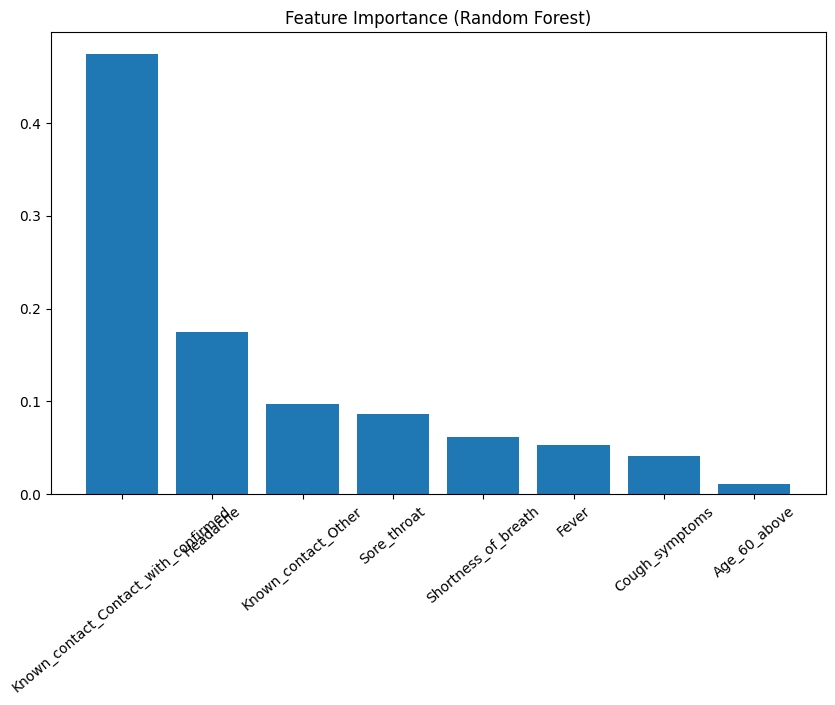

In [ ]:
#Checking for which feature has contributed more  for Random Forest Model

import matplotlib.pyplot as plt
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)[::-1]
print(importances)
print(indices)
print(X_train_rfe.shape)
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_rfe.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_rfe.shape[1]), selected_features[indices], rotation=40)
plt.title("Feature Importance (Random Forest)")
plt.show()

**Hypothesis 2 : Person with shortness of breath have high chance to corona positive.**

Hypothesis 2 is almost failed as its contribution is very less approx 18.5%
Shortness of breath and corona column depedent on each other but not highly depedent
From graph we can conclude that the person who came in contact with confirmed corona patient ,have high chances to get corona test and get negtive result.

[0.0389397  0.05314888 0.08196768 0.05904424 0.16334435 0.01149262
 0.51232711 0.07973541]
[6 4 2 7 3 1 0 5]
(230101, 8)


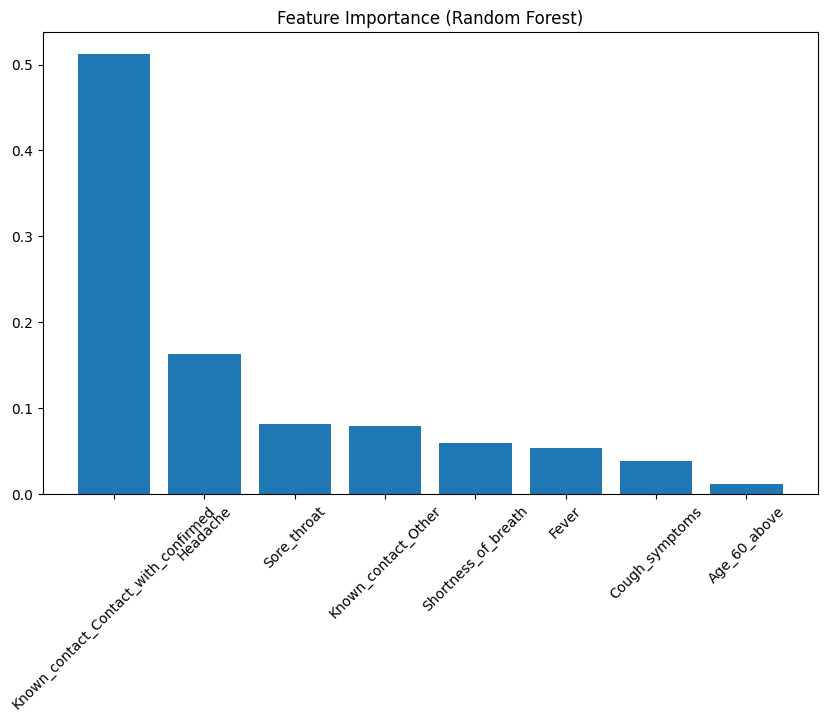

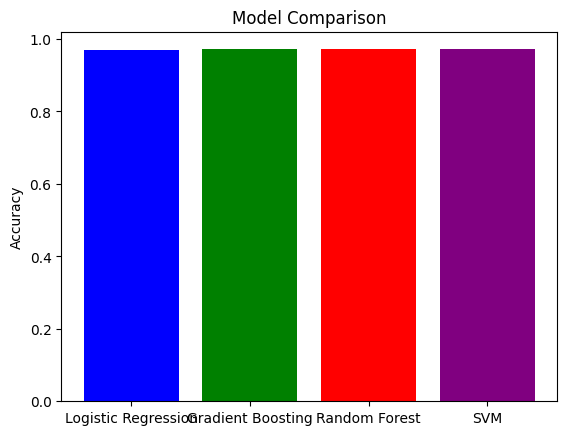

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Gradient Boosting', 'Random Forest', 'SVM']
accuracies = [accuracy_logistic, accuracy_gb, accuracy_rf, accuracy_svm]

plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

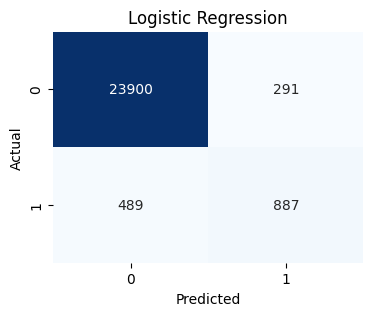

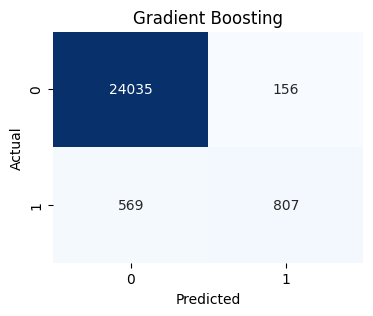

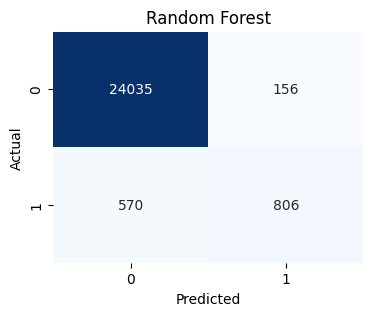

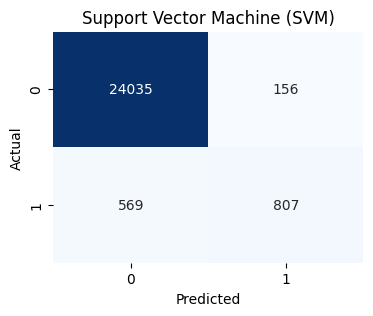

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for each model
plot_confusion_matrix(y_test, y_pred_logistic, 'Logistic Regression')
plot_confusion_matrix(y_test, y_pred_gb, 'Gradient Boosting')
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')
plot_confusion_matrix(y_test, y_pred_svm, 'Support Vector Machine (SVM)')


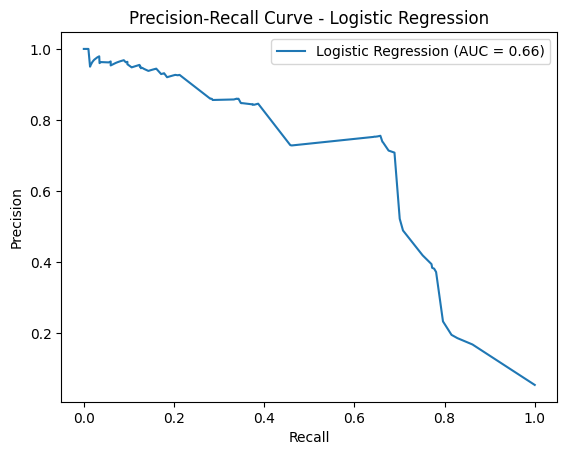

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


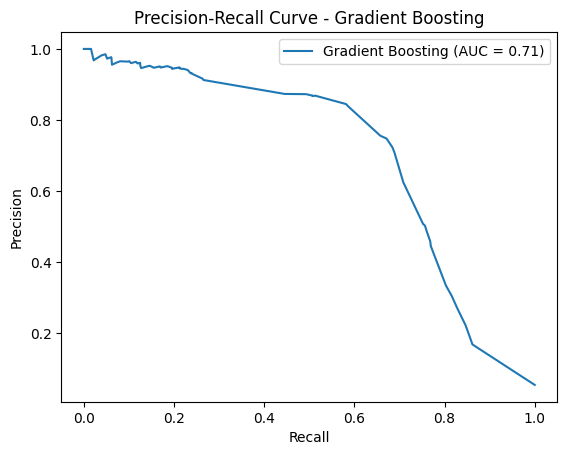

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


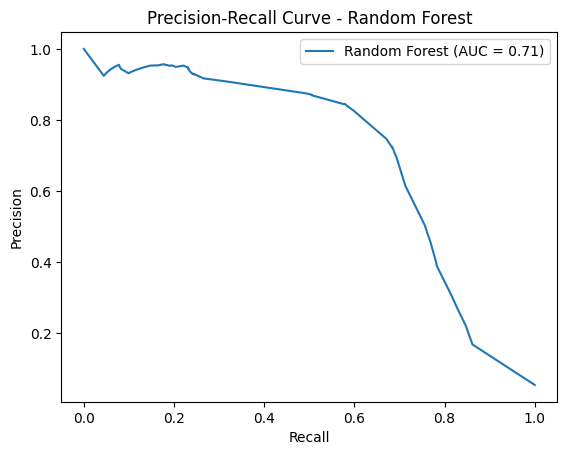

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


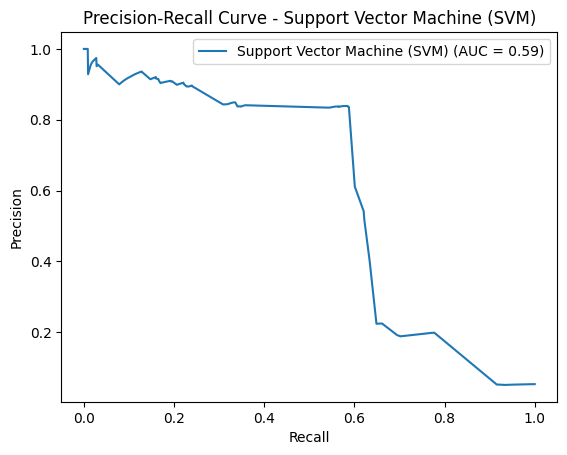

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Function to plot precision-recall curve
def plot_precision_recall_curve(y_true, y_prob, title):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{title} (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {title}')
    plt.legend()
    plt.show()

# Plot precision-recall curve for each model
plot_precision_recall_curve(y_test, logistic_regression_model.predict_proba(X_test[selected_features])[:, 1], 'Logistic Regression')
plot_precision_recall_curve(y_test, gradient_boosting_model.predict_proba(X_test[selected_features])[:, 1], 'Gradient Boosting')
plot_precision_recall_curve(y_test, random_forest_model.predict_proba(X_test[selected_features])[:, 1], 'Random Forest')
plot_precision_recall_curve(y_test, svm_model.decision_function(X_test[selected_features]), 'Support Vector Machine (SVM)')


Q1. What method will you use for machine learning based predictions of COVID19?

Ans : I have used 4 following ML model :


1. Logistic Regression
2. Gradient Boosting
3. Random Forest
4. Support Vector machine


Out of above Logistic regresiion model have lest accuracy value.


Q2. Please justify the most appropriate model.

Ans : In my opinion most appropriate model is Gradient Boosting, its accuracy and auc value is high  and important reason is its learn from previous mistake or say errror.



## SQL Question

Q1 : Find the number of corona patients who faced shortness of breath.


In [ ]:
import duckdb
import pandas as pd
covid_19_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_covid_data.csv')
covid_19_df.head()



,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,13728,2020-03-22,True,False,False,False,False,negative,No,male,Abroad
1,13729,2020-03-22,True,False,False,False,False,negative,No,female,Abroad
2,13731,2020-03-22,True,True,False,False,False,positive,Yes,female,Other
3,13735,2020-03-22,False,False,False,False,False,negative,No,male,Other
4,13736,2020-03-22,False,False,False,False,False,negative,No,female,Other


In [ ]:
covid_19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255668 entries, 0 to 255667
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               255668 non-null  int64 
 1   Test_date            255668 non-null  object
 2   Cough_symptoms       255668 non-null  bool  
 3   Fever                255668 non-null  bool  
 4   Sore_throat          255668 non-null  bool  
 5   Shortness_of_breath  255668 non-null  bool  
 6   Headache             255668 non-null  bool  
 7   Corona               255668 non-null  object
 8   Age_60_above         255668 non-null  object
 9   Sex                  255668 non-null  object
 10  Known_contact        255668 non-null  object
dtypes: bool(5), int64(1), object(5)
memory usage: 12.9+ MB


In [ ]:
covid_19_df['Test_date'] = pd.to_datetime(covid_19_df['Test_date'], errors='coerce')  # 'coerce' will replace invalid dates with NaT
covid_19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255668 entries, 0 to 255667
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               255668 non-null  int64         
 1   Test_date            255668 non-null  datetime64[ns]
 2   Cough_symptoms       255668 non-null  bool          
 3   Fever                255668 non-null  bool          
 4   Sore_throat          255668 non-null  bool          
 5   Shortness_of_breath  255668 non-null  bool          
 6   Headache             255668 non-null  bool          
 7   Corona               255668 non-null  object        
 8   Age_60_above         255668 non-null  object        
 9   Sex                  255668 non-null  object        
 10  Known_contact        255668 non-null  object        
dtypes: bool(5), datetime64[ns](1), int64(1), object(4)
memory usage: 12.9+ MB


In [ ]:
conn=duckdb.connect()
conn.register('covid_19_data',covid_19_df)

conn.execute("select count(Ind_ID) as number_of_corona_patients  from covid_19_data where Shortness_of_breath='False'  ").fetchdf().head()

,number_of_corona_patients
0,254590


Q2. Find the number of negative corona patients who have fever and sore_throat.

In [ ]:
#ans
conn.execute("select count(*) as number_of_negative_corona_patients  from covid_19_data where Fever='Truee' and Corona='negative' and Sore_throat='True'  ").fetchdf().head()

,number_of_negative_corona_patients
0,0


Q3. Group data by month and rank the number of positive cases

In [ ]:
# Q2: Group data by month and rank the number of positive cases
q2_query = """
SELECT EXTRACT(MONTH FROM Test_date) as month, COUNT(*) as num_positive_cases
FROM covid_19_data
WHERE Corona = 'positive'
GROUP BY month
ORDER BY num_positive_cases DESC;
"""
# result_q2 = conn.execute(q2_query).fetchall()
# print("Q2:", result_q2)
print(conn.execute(q2_query).fetchdf())

    month  num_positive_cases
0       3                5260
1       4                4116
2       1                 677
3       2                 614
4       5                 505
5       7                 479
6       6                 392
7      10                 356
8      11                 289
9       9                 287
10     12                 286
11      8                 271


Q4. Female negative corona patients who faced cough and headache

In [ ]:
q3_query = """
SELECT COUNT(*) as num_female_negative_cases
FROM covid_19_data
WHERE Corona = 'negative' AND Sex = 'Female' AND Cough_symptoms = 'True' AND Headache = 'True';
"""
print(conn.execute(q3_query).fetchdf())


   num_female_negative_cases
0                          0


Q5. How many elderly corona patients have faced breathing problems?

Q6. Which three symptoms were more common among COVID positive patients?

Q7. Which symptom was less common among COVID negative people?

Q8. What are the most common symptoms among COVID positive males whose known contact was abroad?

In [ ]:
#Q5. How many elderly corona patients have faced breathing problems?
q5_query = """
SELECT COUNT(*) as num_corona_patients_with_breathing_problems
FROM covid_19_data
WHERE  Shortness_of_breath = 'True' AND Age_60_above = 'Yes';
"""
print(conn.execute(q5_query).fetchdf())

   num_corona_patients_with_breathing_problems
0                                          245


Q6. Which three symptoms were more common among COVID positive patients?

In [ ]:
#Q6. Which three symptoms were more common among COVID positive patients?


query_6="""
SELECT
    symptom,
    SUM(count) AS total_count
FROM (
    SELECT 'Cough_symptoms' AS symptom, SUM(CAST(Cough_symptoms AS INTEGER)) AS count FROM covid_19_data WHERE Corona = 'positive'
    UNION ALL
    SELECT 'Fever' AS symptom, SUM(CAST(Fever AS INTEGER)) AS count FROM covid_19_data WHERE Corona = 'positive'
    UNION ALL
    SELECT 'Sore_throat' AS symptom, SUM(CAST(Sore_throat AS INTEGER)) AS count FROM covid_19_data WHERE Corona = 'positive'
    UNION ALL
    SELECT 'Shortness_of_breath' AS symptom, SUM(CAST(Shortness_of_breath AS INTEGER)) AS count FROM covid_19_data WHERE Corona = 'positive'
    UNION ALL
    SELECT 'Headache' AS symptom, SUM(CAST(Headache AS INTEGER)) AS count FROM covid_19_data WHERE Corona = 'positive'
) AS symptoms_counts
GROUP BY symptom
ORDER BY total_count DESC
LIMIT 3;

"""
print(conn.execute(query_6).fetchdf())






          symptom  total_count
0  Cough_symptoms       6064.0
1           Fever       5040.0
2        Headache       2005.0


Q7. Which symptom was less common among COVID negative people?

In [ ]:
#Q7. Which symptom was less common among COVID negative people?
query_7="""
SELECT
    symptom as least_symptom,
    SUM(count) AS least_symptom_count
FROM (
    SELECT 'Cough_symptoms' AS symptom, SUM(CAST(Cough_symptoms AS INTEGER)) AS count FROM covid_19_data WHERE Corona = 'negative'
    UNION ALL
    SELECT 'Fever' AS symptom, SUM(CAST(Fever AS INTEGER)) AS count FROM covid_19_data WHERE Corona = 'negative'
    UNION ALL
    SELECT 'Sore_throat' AS symptom, SUM(CAST(Sore_throat AS INTEGER)) AS count FROM covid_19_data WHERE Corona = 'negative'
    UNION ALL
    SELECT 'Shortness_of_breath' AS symptom, SUM(CAST(Shortness_of_breath AS INTEGER)) AS count FROM covid_19_data WHERE Corona = 'negative'
    UNION ALL
    SELECT 'Headache' AS symptom, SUM(CAST(Headache AS INTEGER)) AS count FROM covid_19_data WHERE Corona = 'negative'
) AS symptoms_counts
GROUP BY symptom
ORDER BY least_symptom_count ASC
LIMIT 3;

"""
print(conn.execute(query_7).fetchdf())

         least_symptom  least_symptom_count
0             Headache                 98.0
1  Shortness_of_breath                 99.0
2          Sore_throat                137.0


Q8. What are the most common symptoms among COVID positive males whose known contact was abroad?

In [ ]:
#Q8. What are the most common symptoms among COVID positive males whose known contact was abroad?
    # Corona = 'positive' AND Sex = 'Male' AND Known_contact = 'Abroad';

query_8="""
SELECT
    symptom,
    SUM(count) AS total_count
FROM (
    SELECT 'Cough_symptoms' AS symptom, SUM(CAST(Cough_symptoms AS INTEGER)) AS count FROM covid_19_data WHERE Corona = 'positive' AND Sex = 'Male' AND Known_contact = 'Abroad'
    UNION ALL
    SELECT 'Fever' AS symptom, SUM(CAST(Fever AS INTEGER)) AS count FROM covid_19_data WHERE Corona = 'positive' AND Sex = 'Male' AND Known_contact = 'Abroad'
    UNION ALL
    SELECT 'Sore_throat' AS symptom, SUM(CAST(Sore_throat AS INTEGER)) AS count FROM covid_19_data WHERE Corona = 'positive' AND Sex = 'Male' AND Known_contact = 'Abroad'
    UNION ALL
    SELECT 'Shortness_of_breath' AS symptom, SUM(CAST(Shortness_of_breath AS INTEGER)) AS count FROM covid_19_data WHERE Corona = 'positive' AND Sex = 'Male' AND Known_contact = 'Abroad'
    UNION ALL
    SELECT 'Headache' AS symptom, SUM(CAST(Headache AS INTEGER)) AS count FROM covid_19_data WHERE Corona = 'positive' AND Sex = 'Male' AND Known_contact = 'Abroad'
) AS symptoms_counts
GROUP BY symptom
ORDER BY total_count DESC
LIMIT 3;

"""
print(conn.execute(query_8).fetchdf())

               symptom  total_count
0       Cough_symptoms          NaN
1          Sore_throat          NaN
2  Shortness_of_breath          NaN
